# <----------------------------  DAY 1 No Code  ------------------------------>



# <----------------------------------------------------  **DAY :- 02**  ---------------------------------------------------->

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import random

In [ ]:
df=pd.read_csv('insurance_data.csv')

In [ ]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
X=df.drop(columns='bought_insurance',axis=1)

In [ ]:
X.head(2)

,age,affordibility
0,22,1
1,25,0


In [ ]:
y=df['bought_insurance']

In [ ]:
y.head(2)

0    0
1    0
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=11)

In [ ]:
X_train.head(2)

,age,affordibility
27,46,1
3,52,0


In [ ]:
X_train.shape

(25, 2)

In [ ]:
y_train.head(2)

27    0
3     0
Name: bought_insurance, dtype: int64

In [ ]:
X_test

,age,affordibility
11,28,1
8,62,1
6,55,0


In [ ]:
y_test

11    0
8     1
6     0
Name: bought_insurance, dtype: int64

In [ ]:
# model=keras.Sequential([
#     keras.layers.Dense(2,input_shape=(2,),activation="sigmoid"),
#     keras.layers.Dense(5,activation="sigmoid"),
#     keras.layers.Dense(2,activation="sigmoid")
#     ])

# model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# model.fit(X_train,y_train,epochs=5)

In [ ]:
model=keras.Sequential(
    keras.layers.Dense(2,input_shape=(2,),activation="sigmoid"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 527ms/step - loss: 60.0493 - accuracy: 0.4800
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 59.9957 - accuracy: 0.4800
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 59.9421 - accuracy: 0.4800
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 59.8885 - accuracy: 0.4800
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 59.8349 - accuracy: 0.4800


In [ ]:
model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 161ms/step - loss: 59.7812 - accuracy: 0.4800


[59.78125, 0.47999998927116394]

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 73ms/step


In [ ]:
y_pred

array([[1.0000000e+00, 4.2428805e-14],
       [1.0000000e+00, 8.8258824e-30],
       [1.0000000e+00, 4.3091357e-26]], dtype=float32)

In [ ]:
y_pred.shape

(3, 2)

In [ ]:
np.argmax(y_pred[2])

0

In [ ]:
lst=[]
for i in y_pred:
  lst.append(np.argmax(i))

In [ ]:
lst

[0, 0, 0]

In [ ]:
weights=model.get_weights()

In [ ]:
weights

[array([[ 1.2142916, -1.0620269],
        [ 1.1371199, -1.0591971]], dtype=float32),
 array([-0.00499994,  0.00499994], dtype=float32)]

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def log_loss(y_t, y_p):
    e = 1e-10
    y_pd = [max(i, e) for i in y_p]
    y_pd = [min(i, 1 - e) for i in y_pd]  # Change max to min here
    y_pd = np.array(y_pd)
    return -np.mean(y_t * np.log(y_pd) + (1 - y_t) * np.log(1 - y_pd))

# <--------------------------  Batch Gradient Descent  ---------------------->

In [ ]:
def gradient_descent(age,aff,y_t,epoches,loss_thr):
  w1=1
  w2=2
  b=0
  n=len(age)
  LR=0.5

  for i in range(epoches):
    W_S= w1*age + w2 * aff + b
    y_p= sigmoid(W_S)
    loss= log_loss(y_t,y_p)

    w_age= (1/n)*np.dot(age,(y_p-y_t))
    w_aff= (1/n)*np.dot(aff,(y_p-y_t))
    bais= np.dot(aff,(y_t-y_p))

    w1=w1-LR*w_age
    w2=w2-LR*w_aff
    b=b - LR * bais

    print("Epochs-",i," ","W1-",w1," ","w2-",w2," ","bais-",b , "Loss :- ", loss)
  return w1,w2,bais

In [ ]:
gradient_descent( X_train['age'], X_train['affordibility'], y_train, 10,21.2229)

Epochs- 0   W1- -5.519999996303101   w2- 1.8800000000855313   bais- 2.9999999978617176 Loss :-  10.648272266018223
Epochs- 1   W1- 7.400000003696899   w2- 2.1000000000855312   bais- -2.5000000021382824 Loss :-  11.973442483617038
Epochs- 2   W1- 0.8800000036968987   w2- 1.9800000000855311   bais- 0.49999999786171756 Loss :-  11.052408406708043
Epochs- 3   W1- -5.639999974953159   w2- 1.8600000005529471   bais- 3.49999998617632 Loss :-  10.280370180112383
Epochs- 4   W1- 7.280000025046841   w2- 2.080000000552947   bais- -2.00000001382368 Loss :-  11.973442483617038
Epochs- 5   W1- 0.7600000250468408   w2- 1.960000000552947   bais- 0.99999998617632 Loss :-  11.052408406708043
Epochs- 6   W1- -5.7599998500928065   w2- 1.840000003131211   bais- 3.999999921719722 Loss :-  9.56470230431996
Epochs- 7   W1- 7.1600001499071935   w2- 2.060000003131211   bais- -1.5000000782802778 Loss :-  11.973442483617038
Epochs- 8   W1- 0.640000149907193   w2- 1.9400000031312108   bais- 1.4999999217197222 Loss

(-5.87999910362541, 1.8200000175520021, -5.9999992789604315)

In [ ]:
class ANN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.b=0

  def fit(self,x,y,epoches):
    self.gradient_descent(x['age'],x['affordibility'], y,epoches)

  def gradient_descent(self,age,aff,y_t,epoches):
    w1=1
    w2=1
    b=0
    n=len(age)
    LR=0.5

    for i in range(epoches):
      W_S= w1*age + w2 * aff + b
      y_p= sigmoid(W_S)
      loss= log_loss(y_t,y_p)

      w_age= (1/n)*np.dot(age,(y_p-y_t))
      w_aff= (1/n)*np.dot(aff,(y_p-y_t))
      bais= np.dot(aff,(y_t-y_p))

      w1=w1-LR*w_age
      w2=w2-LR*w_aff
      b=b - LR * bais

      print("Epochs-",i," ","W1-",w1," ","w2-",w2," ","bais-",b , "Loss :- ", loss)
    return w1,w2,bais

  def predict(self,x):
    vlu= self.w1 * x['age'] + self.w2 * x['affordibility'] + self.b
    y_p= np.array(sigmoid(vlu))
    return y_p



In [ ]:
value= ANN()
value.fit(X_train,y_train,15)

Epochs- 0   W1- -5.519999993639541   w2- 0.8800000002324981   bais- 2.9999999941875455 Loss :-  10.527238226596818
Epochs- 1   W1- 7.400000006360459   w2- 1.100000000232498   bais- -2.5000000058124545 Loss :-  11.973442483617038
Epochs- 2   W1- 0.8800000063604587   w2- 0.9800000002324981   bais- 0.4999999941875455 Loss :-  11.052408406708043
Epochs- 3   W1- -5.639999957683168   w2- 0.8600000015030662   bais- 3.4999999624233444 Loss :-  10.080370211375351
Epochs- 4   W1- 7.280000042316832   w2- 1.0800000015030662   bais- -2.0000000375766556 Loss :-  11.973442483617038
Epochs- 5   W1- 0.7600000423168316   w2- 0.9600000015030662   bais- 0.9999999624233444 Loss :-  11.052408406708043
Epochs- 6   W1- -5.759999751835554   w2- 0.8400000085115115   bais- 3.9999997872122135 Loss :-  9.364702447585907
Epochs- 7   W1- 7.160000248164446   w2- 1.0600000085115115   bais- -1.5000002127877865 Loss :-  11.973442483617038
Epochs- 8   W1- 0.6400002481644451   w2- 0.9400000085115116   bais- 1.499999787212

In [ ]:
value.predict(X_test)

array([1., 1., 1.])

# <--------------------------  Stocastic Gradient Descent  ---------------------->

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def log_loss(y_t, y_p):
    e = 1e-10
    y_pd = np.clip(y_p, e, 1 - e)
    return -(y_t * np.log(y_pd) + (1 - y_t) * np.log(1 - y_pd))

In [ ]:
class ANN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.b=0

  def fit(self,x,y,epoches):
    self.stocastic_gradient_descent(x['age'],x['affordibility'], y,epoches)

  def stocastic_gradient_descent(self,age,aff,y_t,epoches):
    w1=1
    w2=1
    b=0
    n=len(age)
    LR=0.5
    age=np.array(age)
    y_t=np.array(y_t)
    aff=np.array(aff)

    for i in range(epoches):
      r=random.randint(0,len(age)-1)
      W_S= w1*age[r] + w2 * aff[r] + b
      y_p= sigmoid(W_S)
      loss= log_loss(y_t[r],y_p)



      w_age= (age[r]*(y_p-y_t[r]))
      w_aff= (aff[r]*(y_p-y_t[r]))
      bais= (aff[r]*(y_t[r]-y_p))

      w1 = w1-LR*w_age
      w2 = w2-LR*w_aff
      b = b - LR * bais

      print("Epochs-",i," ","W1-",w1," ","w2-",w2," ","bais-",b , "Loss :- ", loss)
    return w1,w2,bais

  def predict(self,x):
    vlu= self.w1 * x['age'] + self.w2 * x['affordibility'] + self.b
    y_p= np.array(sigmoid(vlu))
    return y_p



In [ ]:
stc=ANN()

In [ ]:
stc.fit(X_train,y_train,10)

Epochs- 0   W1- -7.999999949574832   w2- 0.5000000028013982   bais- 0.4999999971986018 Loss :-  18.999999997952088
Epochs- 1   W1- 15.500000050425168   w2- 1.0000000028013982   bais- -2.801398224505647e-09 Loss :-  23.025850929940457
Epochs- 2   W1- 15.500000050425168   w2- 1.0000000028013982   bais- -2.801398224505647e-09 Loss :-  1.000000082790371e-10
Epochs- 3   W1- 6.000000050425168   w2- 1.0000000028013982   bais- -2.801398224505647e-09 Loss :-  23.02585084720009
Epochs- 4   W1- -6.999999949574832   w2- 1.0000000028013982   bais- -2.801398224505647e-09 Loss :-  23.02585084720009
Epochs- 5   W1- -6.999999949574832   w2- 1.0000000028013982   bais- -2.801398224505647e-09 Loss :-  1.000000082790371e-10
Epochs- 6   W1- 17.500000050425168   w2- 1.5000000028013982   bais- -0.5000000028013982 Loss :-  23.025850929940457
Epochs- 7   W1- 17.500000050425168   w2- 1.5000000028013982   bais- -0.5000000028013982 Loss :-  1.000000082790371e-10
Epochs- 8   W1- 3.000000050425168   w2- 1.5000000028

# ////////----------->  Mini Batch Gradient Descent <----------------//////////////

In [ ]:
class ANN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.b=0

  def fit(self,x,y,epoches,batch):
    self.minibatch_gradient_descent(x['age'],x['affordibility'], y,epoches,batch)

  def minibatch_gradient_descent(self,age,aff,y_t,epoches,batch):
    w1=1
    w2=1
    b=0
    n=len(age)
    LR=0.5
    age=np.array(age)
    y_t=np.array(y_t)
    aff=np.array(aff)

    for i in range(epoches):
       for j in range(int(len(age) / batch)):
        r = random.sample(range(0, len(age) - 1),batch)
        W_S= w1*age[r] + w2 * aff[r] + b
        y_p= sigmoid(W_S)
        loss= log_loss(y_t[r],y_p)



        w_age= (age[r]*(y_p-y_t[r]))
        w_aff= (aff[r]*(y_p-y_t[r]))
        bais= (aff[r]*(y_t[r]-y_p))

        w1 = w1-LR*w_age
        w2 = w2-LR*w_aff
        b = b - LR * bais

        print("Epochs-",i," ","W1-",w1," ","w2-",w2," ","bais-",b , "Loss :- ", loss)
    return w1,w2,bais

  def predict(self,x):
    vlu= self.w1 * x['age'] + self.w2 * x['affordibility'] + self.b
    y_p= np.array(sigmoid(vlu))
    return y_p



In [ ]:
batch=ANN()

In [ ]:
batch.fit(X_train,y_train,2,5)

Epochs- 0   W1- [-13.5  -9.5 -12.    1.    1. ]   w2- [1.  0.5 1.  1.  1. ]   bais- [0.  0.5 0.  0.  0. ] Loss :-  [2.30258508e+01 2.19999998e+01 2.30258508e+01 1.00000008e-10
 1.00000008e-10]
Epochs- 0   W1- [  9.   -9.5 -12.    1.  -11.5]   w2- [1.5 0.5 1.  1.  1. ]   bais- [-5.0000000e-01  5.0000000e-01  2.1166858e-94  0.0000000e+00
  0.0000000e+00] Loss :-  [2.30258509e+01 1.00000008e-10 1.00000008e-10 1.00000008e-10
 2.30258508e+01]
Epochs- 0   W1- [  9.   21.  -12.  -12.5  13.5]   w2- [1.5 1.  1.  1.  1.5]   bais- [-5.00000000e-01 -1.39473433e-10  4.23337159e-94  0.00000000e+00
 -5.00000000e-01] Loss :-  [1.00000008e-10 2.30258509e+01 1.00000008e-10 2.30258508e+01
 2.30258509e+01]
Epochs- 0   W1- [  9.   21.  -12.   12.    0.5]   w2- [1.5 1.  1.  1.5 1.5]   bais- [-5.00000000e-01 -1.39473433e-10  4.23337159e-94 -5.00000000e-01
 -5.00000000e-01] Loss :-  [1.00000008e-10 1.00000008e-10 1.00000008e-10 2.30258509e+01
 2.30258508e+01]
Epochs- 0   W1- [ -1.5  21.  -12.   12.    0.5]   

<ipython-input-32-db0614563abc>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [ ]:
batch.predict(X_test)

array([1., 1., 1.])

# <---------------------------------------------- DAY :- 03 ------------------------------------------>

# LOAD DATA

In [ ]:
data= pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# <<=========================>> DATA PREPROCESSING

In [ ]:
data.shape

(13320, 9)

In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
data = data[data['area_type'] != 'Carpet  Area']

In [ ]:
data['availability'].isna().sum()

0

In [ ]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
data['location'].isnull().sum()

1

In [ ]:
data['location']=data['location'].fillna('Whitefield')

In [ ]:
data['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    267
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1301, dtype: int64

In [ ]:
import pandas as pd

for i in data['location']:
    if (data['location'] == i).sum() <= 5:
        data['location'] = data['location'].replace(i, 'other')


In [ ]:
data['location'].value_counts()

381    1739
373     541
317     399
132     301
210     267
       ... 
340       5
99        5
374       5
120       4
278       3
Name: location, Length: 382, dtype: int64

In [ ]:
data['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13233, dtype: object

In [ ]:
data['size']=data['size'].str.replace(' Bedroom','')

In [ ]:
data['size']=data['size'].str.replace(' BHK','')

In [ ]:
data['size']=data['size'].str.replace(' RK','')

In [ ]:
data['size']=data['size'].fillna(mode(data['size']))

In [ ]:
data['size'].value_counts()

2     5512
3     4826
4     1410
1      644
5      355
6      220
7       99
8       88
9       53
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5469
total_sqft         0
bath              73
balcony          604
price              0
dtype: int64

In [ ]:
for i in data['size'].unique():
    if (data['size'] == i).sum() <= 101:
        data = data[data['size'] != i]

In [ ]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Komesa      1
Gilleon     1
UKanema     1
MaionPa     1
RSntsAp     1
Name: society, Length: 2667, dtype: int64

In [ ]:
data['society']=data['society'].fillna('GrrvaGr')

In [ ]:
import pandas as pd

for i in data['society']:
    if (data['society'] == i).sum() < 4 :
        data['society'] = data['society'].replace(i, 'other')


In [ ]:
data['bath']=data['bath'].fillna(data['bath'].mean())

In [ ]:
data['balcony']=data['balcony'].fillna(0)

In [ ]:
np.median(data['balcony'])

2.0

In [ ]:
data['balcony']=data['balcony'].replace(0,np.median(data['balcony']))

In [ ]:
data['balcony'].value_counts()

2.0    6551
1.0    4830
3.0    1586
Name: balcony, dtype: int64

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.0,51.00


# -------------------------  DATA ENCODING  ---------------------------------

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
lbe=LabelEncoder()

In [ ]:
data['area_type']=lbe.fit_transform(data['area_type'])

In [ ]:
data['location']=lbe.fit_transform(data['location'])

In [ ]:
data['society']=lbe.fit_transform(data['society'])

# ////////////-------------->     SPLIT DATASET INTO X AND y       <-------------/////////////

In [ ]:
X=data.drop(columns=['availability','price','total_sqft'],axis=1)

In [ ]:
X.head()

,area_type,location,size,society,bath,balcony
0,2,133,2,74,2.0,1.0
1,1,101,4,434,5.0,3.0
2,0,355,3,135,2.0,3.0
3,2,242,3,393,3.0,1.0
4,2,233,2,135,2.0,1.0


In [ ]:
y=data['price']

In [ ]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 12967, dtype: float64

In [ ]:
l=[]
for i in X['size']:
  l.append(int(i))

In [ ]:
X['size']=l

# **********************  Split Into Train And Test Dataset **********************

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [ ]:
X_train

,area_type,location,size,society,bath,balcony
4286,0,158,2,122,2.0,2.0
2913,2,117,3,135,3.0,2.0
7796,2,207,2,462,2.0,2.0
5889,1,344,2,135,2.0,2.0
8764,2,380,3,121,3.0,3.0
...,...,...,...,...,...,...
3827,0,317,3,135,3.0,2.0
7625,1,56,4,135,6.0,2.0
3429,0,381,2,462,2.0,2.0
9872,2,312,2,462,2.0,2.0


In [ ]:
y_train

4286    102.0
2913    121.0
7796     37.0
5889     55.0
8764    140.0
        ...  
3827     62.0
7625    170.0
3429     63.0
9872     72.0
5965    105.0
Name: price, Length: 9725, dtype: float64

In [ ]:
X_test

,area_type,location,size,society,bath,balcony
203,2,373,2,135,2.0,1.0
833,2,381,2,135,1.0,2.0
684,2,24,3,135,3.0,2.0
12197,0,111,2,462,2.0,2.0
13062,2,381,3,462,3.0,2.0
...,...,...,...,...,...,...
12654,2,155,2,135,2.0,2.0
8952,2,355,3,135,2.0,2.0
9583,0,298,3,65,3.0,3.0
6140,2,257,2,27,1.0,1.0


In [ ]:
y_test

203       53.00
833       15.00
684       40.00
12197     42.00
13062     79.99
          ...  
12654     44.00
8952      50.00
9583      98.00
6140      17.00
11614    103.00
Name: price, Length: 3242, dtype: float64

# SCALLING OF THE DATASET using MinmaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms=MinMaxScaler()

In [ ]:
X=ms.fit_transform(X)

In [ ]:
X=pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5
0,1.0,0.349081,0.2,0.160173,0.125,0.0
1,0.5,0.265092,0.6,0.939394,0.500,1.0
2,0.0,0.931759,0.4,0.292208,0.125,1.0
3,1.0,0.635171,0.4,0.850649,0.250,0.0
4,1.0,0.611549,0.2,0.292208,0.125,0.0
...,...,...,...,...,...,...
12962,0.0,0.979003,0.8,0.054113,0.375,0.5
12963,1.0,0.805774,0.6,0.292208,0.500,0.5
12964,0.0,0.782152,0.2,1.000000,0.125,0.0
12965,1.0,0.753281,0.6,1.000000,0.375,0.0


# |||||||||||||||||||   MAKE MODEL ||||||||||||||

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr=RandomForestClassifier()

In [ ]:
# lr.fit(X_train,y_train)

In [ ]:
# lr.score(X_train,y_train)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(6,),activation="linear"),
     keras.layers.Dense(20,activation="linear"),
     keras.layers.Dense(15,activation="linear"),
     keras.layers.Dense(30,activation="linear"),
      keras.layers.Dense(1,activation="linear")
    ])

model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

model.fit(X_train,y_train,epochs=15)

Epoch 1/15
304/304 [==============================] - 2s 2ms/step - loss: 18519.0195 - mae: 69.3502
Epoch 2/15
304/304 [==============================] - 1s 2ms/step - loss: 16679.1543 - mae: 63.7628
Epoch 3/15
304/304 [==============================] - 1s 2ms/step - loss: 15319.5742 - mae: 62.3324
Epoch 4/15
304/304 [==============================] - 1s 2ms/step - loss: 14874.0674 - mae: 61.5162
Epoch 5/15
304/304 [==============================] - 1s 3ms/step - loss: 14707.8711 - mae: 60.3050
Epoch 6/15
304/304 [==============================] - 1s 3ms/step - loss: 14466.2012 - mae: 59.2073
Epoch 7/15
304/304 [==============================] - 1s 3ms/step - loss: 14408.6094 - mae: 59.4250
Epoch 8/15
304/304 [==============================] - 1s 3ms/step - loss: 14027.0908 - mae: 57.6907
Epoch 9/15
304/304 [==============================] - 1s 2ms/step - loss: 14135.5322 - mae: 57.7396
Epoch 10/15
304/304 [==============================] - 1s 2ms/step - loss: 13935.8301 - mae: 57.3319

In [ ]:
model.evaluate(X_train,y_train)

304/304 [==============================] - 1s 1ms/step - loss: 13888.6152 - mae: 63.2096


[13888.615234375, 63.209632873535156]

In [ ]:
y_pred=model.predict(X_train)

304/304 [==============================] - 1s 2ms/step


In [ ]:
y_pred.shape,y_train.shape

((9725, 1), (9725,))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
v=r2_score(y_train,y_pred)

In [ ]:
v

0.23047905983062544

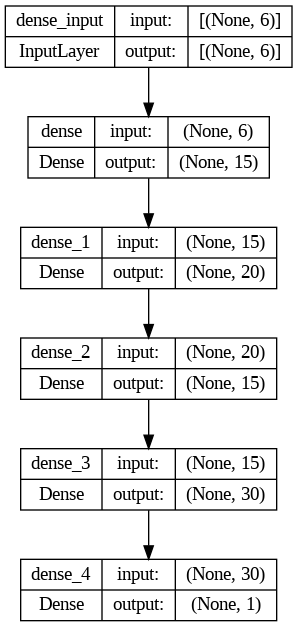

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)